In [116]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats


In [117]:
np.random.seed(42)
data_n = np.random.randn(500)

# statsmodels.qqplot vs. scipy.stats.probplot 

## Case 1: Normally distributed data (baseline)

### statsmodels.qqplot

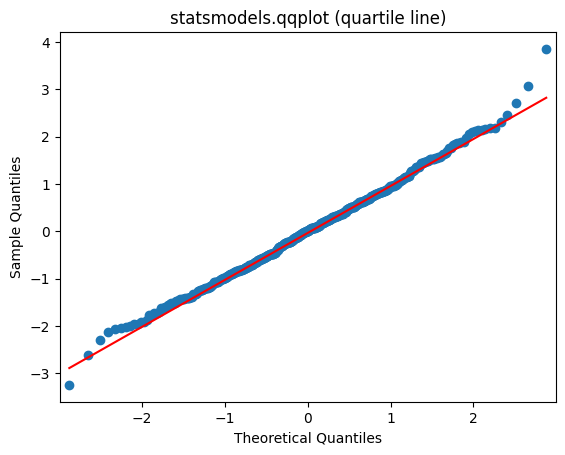

In [120]:
sm.qqplot(data_n, line='q')
plt.title("statsmodels.qqplot (quartile line)")
plt.show()


What it does:
- Computes theoretical quantiles
- Draws a robust quartile line
- Focused on visual diagnostics

### scipy.stats.probplot

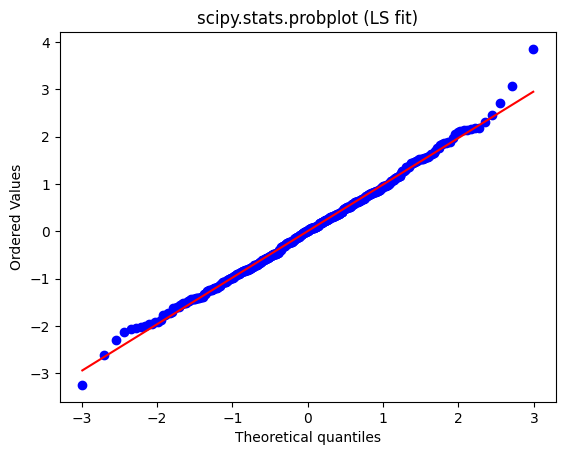

In [121]:
stats.probplot(data_n, dist="norm", plot=plt)
plt.title("scipy.stats.probplot (LS fit)")
plt.show()

What it does:
- Computes quantiles
- Fits least-squares regression line
- Also computes numerical statistics

Key difference (Case 1)
| Aspect              | statsmodels       | scipy               |
| ------------------- | ----------------- | ------------------- |
| Reference line      | Quartiles (`'q'`) | Least-squares       |
| Outlier sensitivity | Low               | High                |
| Purpose             | Visual check      | Statistical summary |

## Case 2: Skewed data (Exponential)

In [122]:
data_e = np.random.exponential(scale=1, size=500)

### statsmodels.qqplot

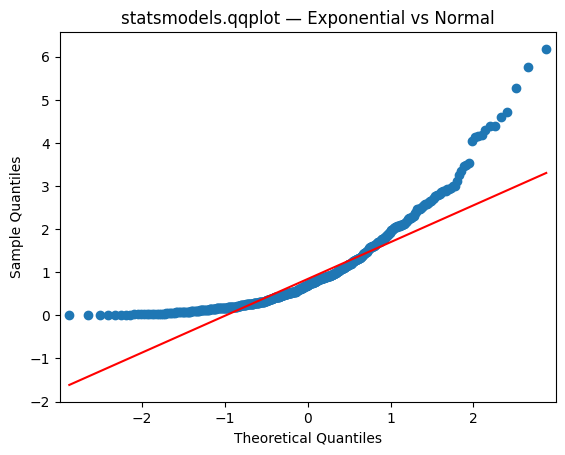

In [125]:
sm.qqplot(data_e, line='q')
plt.title("statsmodels.qqplot — Exponential vs Normal")
plt.show()

Interpretation:
- Strong curvature
- Quartile line still stable
- Easy to see skewness

### scipy.stats.probplot

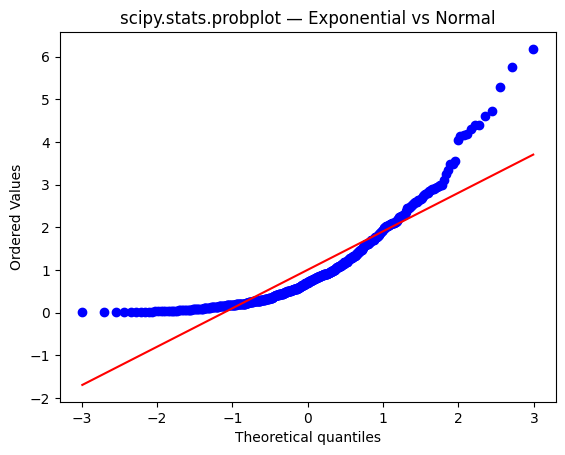

In [127]:
stats.probplot(data_e, dist="norm", plot=plt)
plt.title("scipy.stats.probplot — Exponential vs Normal")
plt.show()


Interpretation
- Regression line pulled by tail
- Still useful, but less robust visually

Key difference (Case 2)
- probplot tries to fit
- qqplot tries to show

## Case 3: Data with outliers

In [128]:
data_outliers = np.concatenate([
    np.random.randn(480),
    np.random.randn(20) * 10
])

### statsmodels.qqplot

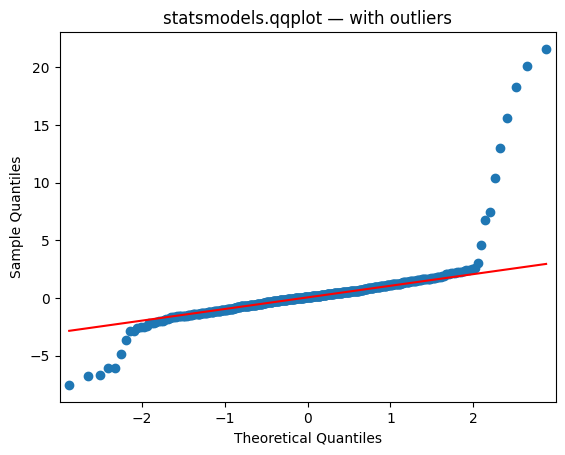

In [130]:
sm.qqplot(data_outliers, line='q')
plt.title("statsmodels.qqplot — with outliers")
plt.show()


Result
- Center aligned
- Outliers clearly visible
- Quartile line barely moves

### scipy.stats.probplot

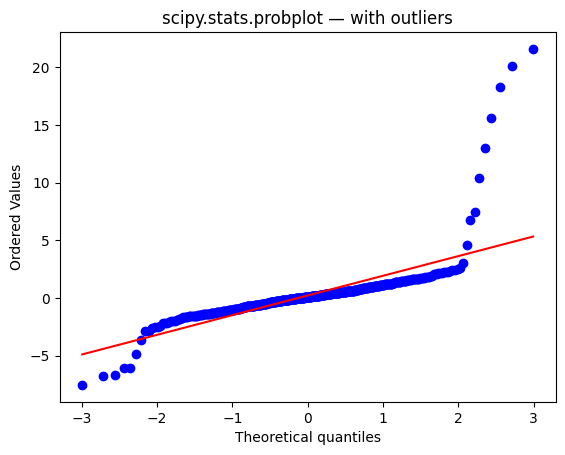

In [131]:
stats.probplot(data_outliers, dist="norm", plot=plt)
plt.title("scipy.stats.probplot — with outliers")
plt.show()


Result
- Regression line bends
- Harder to judge central fit

This is the most important practical difference
| Scenario             | Better choice          |
| -------------------- | ---------------------- |
| Clean synthetic data | Either                 |
| Real-world data      | `statsmodels.qqplot`   |
| Many outliers        | `statsmodels.qqplot`   |
| Formal diagnostics   | `scipy.stats.probplot` |


## Numerical output vs visualization
scipy returns numbers
Useful for:
- Automated diagnostics
- Tests
- Reports

statsmodels returns figure only
Better for:
- Notebooks
- EDA reports
- Teaching

In [132]:
(osm, osr), (slope, intercept, r) = stats.probplot(data_n)

print(f"slope={slope:.3f}, intercept={intercept:.3f}, r={r:.3f}")


slope=0.983, intercept=0.007, r=0.998


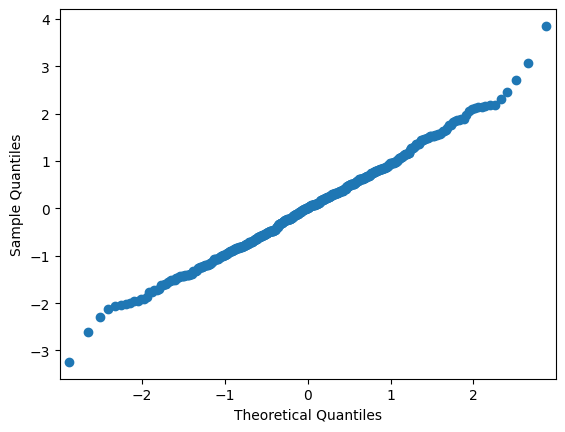

In [133]:
fig = sm.qqplot(data_n)

## Side-by-side comparison table (summary)
| Feature                | statsmodels.qqplot   | scipy.stats.probplot   |
| ---------------------- | -------------------- | ---------------------- |
| Main goal              | Visual diagnostics   | Quantiles + statistics |
| Reference line options | `'45'`, `'q'`, `'r'`  | LS only                |
| Robust to outliers     | ✅                    | ❌                      |
| Returns stats          | ❌                    | ✅                      |
| EDA-friendly           | ⭐⭐⭐⭐                 | ⭐⭐                     |
| Automation-friendly    | ❌                    | ⭐⭐⭐⭐                   |


## Check Exponential vs Exponential distibution

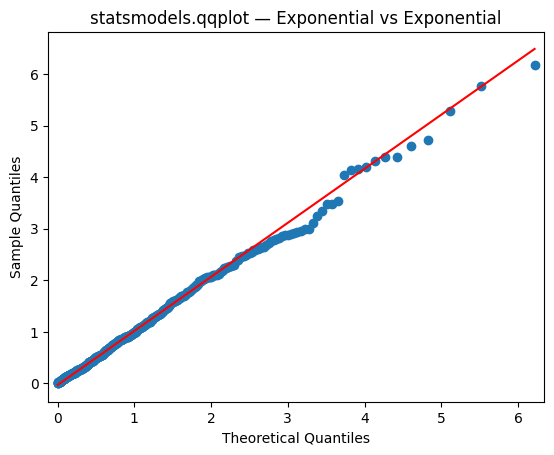

In [135]:
from scipy import stats

sm.qqplot(data_e, line='q', dist=stats.distributions.expon)
plt.title("statsmodels.qqplot — Exponential vs Exponential")
plt.show()

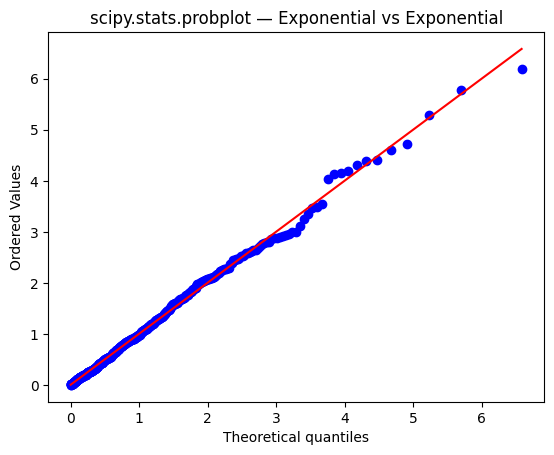

In [137]:
stats.probplot(data_e, dist=stats.distributions.expon, plot=plt)
plt.title("scipy.stats.probplot — Exponential vs Exponential")
plt.show()


# Sample vs Sample Q-Q plot

In [ ]:
# import importlib
# import mlpeople.statistic as mlpeople_statistic
# importlib.reload(mlpeople_statistic)

<module 'mlpeople.statistic' from '/Users/maksymstefanko/ML/ML-love/data-loves-ml-for-people-course/src/mlpeople/statistic/__init__.py'>

In [180]:
from mlpeople.statistic import qqplot_sample_vs_sample, qqplot_from_dataframe

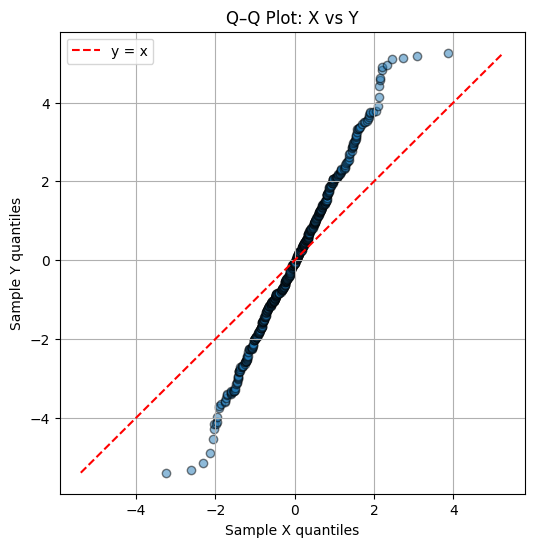

In [181]:
import numpy as np

np.random.seed(42)
x = np.random.normal(0, 1, 500)
y = np.random.normal(0, 2, 350)  # different size and scale

qqplot_sample_vs_sample(x, y, title="Q–Q Plot: X vs Y")
plt.show()


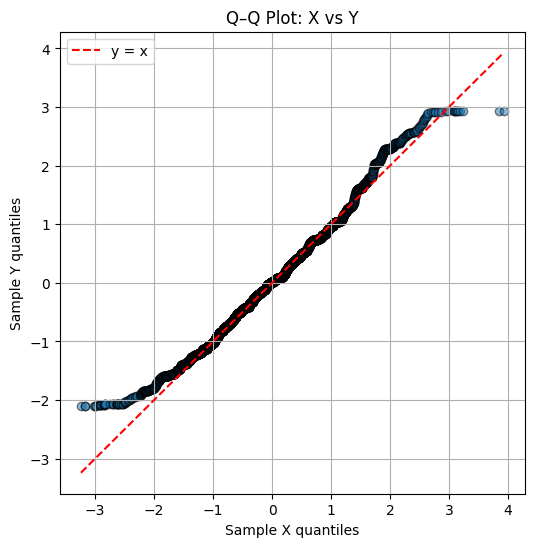

In [182]:
import numpy as np

np.random.seed(42)
x = np.random.normal(0, 1, 5000)
y = np.random.normal(0, 1, 300) 

qqplot_sample_vs_sample(x, y, title="Q–Q Plot: X vs Y")
plt.show()


In [183]:
import pandas as pd
medical_df = pd.read_csv('data/medical-charges.csv')

In [184]:
medical_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Axes: title={'center': 'Q–Q Plot: bmi vs charges (scaled)'}, xlabel='bmi quantiles (scaled)', ylabel='charges quantiles (scaled)'>

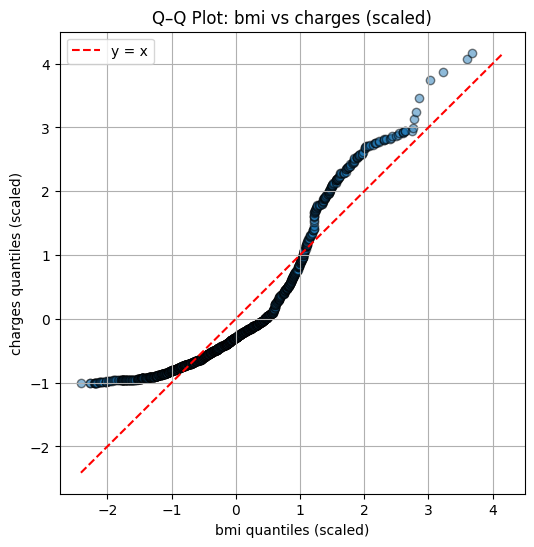

In [185]:
qqplot_from_dataframe(medical_df, 'bmi', 'charges', scale=True)

<Axes: title={'center': 'Q–Q Plot: age vs charges (scaled)'}, xlabel='age quantiles (scaled)', ylabel='charges quantiles (scaled)'>

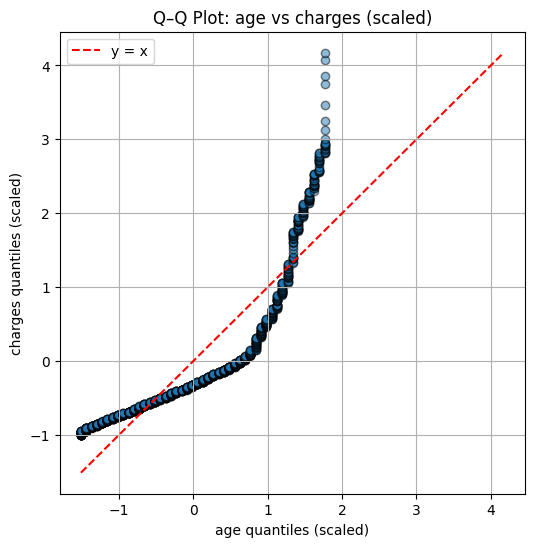

In [186]:
qqplot_from_dataframe(medical_df, 'age', 'charges', scale=True)